In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_dataset.csv')

# Display the first few rows
print(df.head())


   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


In [12]:
# Generate summary statistics
print(df.describe())

# Get the mean and standard deviation of Sepal Length
sepal_length_mean = df['Sepal Length (cm)'].mean()
sepal_length_std = df['Sepal Length (cm)'].std()
print(f"Mean of Sepal Length: \[{sepal_length_mean:.2f}\]")
print(f"Standard Deviation of Sepal Length: \[{sepal_length_std:.2f}\]")


       Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  \
count          15.000000          15.00000          15.000000   
mean            5.906667           3.06000           3.873333   
std             0.873798           0.31803           1.891887   
min             4.600000           2.30000           1.300000   
25%             5.050000           2.95000           1.450000   
50%             6.300000           3.10000           4.600000   
75%             6.500000           3.20000           5.350000   
max             7.100000           3.60000           6.000000   

       Petal Width (cm)  
count         15.000000  
mean           1.246667  
std            0.829687  
min            0.200000  
25%            0.200000  
50%            1.500000  
75%            1.850000  
max            2.500000  
Mean of Sepal Length: \[5.91\]
Standard Deviation of Sepal Length: \[0.87\]


<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\]'
C:\Users\sharo\AppData\Local\Temp\ipykernel_10276\866063764.py:7: SyntaxWarning: invalid escape sequence '\['
  print(f"Mean of Sepal Length: \[{sepal_length_mean:.2f}\]")
C:\Users\sharo\AppData\Local\Temp\ipykernel_10276\866063764.py:7: SyntaxWarning: invalid escape sequence '\]'
  print(f"Mean of Sepal Length: \[{sepal_length_mean:.2f}\]")
C:\Users\sharo\AppData\Local\Temp\ipykernel_10276\866063764.py:8: SyntaxWarning: invalid escape sequence '\['
  print(f"Standard Deviation of Sepal Length: \[{sepal_length_std:.2f}\]")
C:\Users\sharo\AppData\Local\Temp\ipykernel_10276\866063764.py:8: Synta

In [13]:
# Check for missing values
print(df.isnull().sum())

# If there were missing values, you could handle them using various techniques:
# 1. Drop the rows with missing values: df.dropna(inplace=True)
# 2. Fill the missing values with a specific value or the mean/median of the column:
#    df['Sepal Length (cm)'].fillna(df['Sepal Length (cm)'].mean(), inplace=True)


Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64


In [5]:
# Create a mapping dictionary
species_mapping = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}

# Apply the mapping to the 'Species' column
df['Species'] = df['Species'].map(species_mapping)


In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=42)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

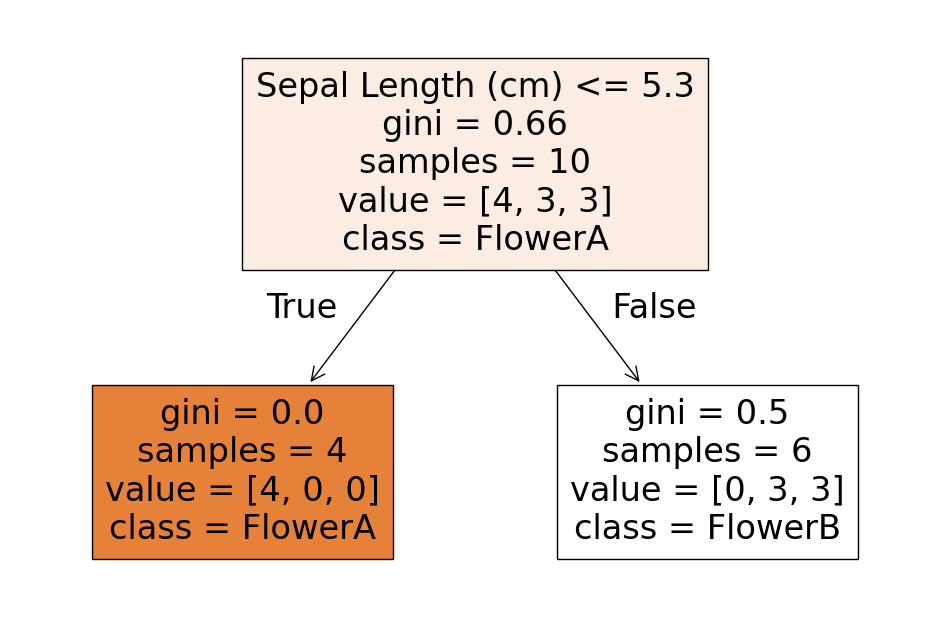

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_clf, feature_names=X.columns, class_names=['FlowerA', 'FlowerB', 'FlowerC'], filled=True)
plt.show()


In [17]:
# Predict the species for the testing data
y_pred = dt_clf.predict(X_test)

# Compute the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: \[{accuracy:.2f}\]")


Accuracy: \[0.60\]


<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\]'
C:\Users\sharo\AppData\Local\Temp\ipykernel_10276\369318603.py:7: SyntaxWarning: invalid escape sequence '\['
  print(f"Accuracy: \[{accuracy:.2f}\]")
C:\Users\sharo\AppData\Local\Temp\ipykernel_10276\369318603.py:7: SyntaxWarning: invalid escape sequence '\]'
  print(f"Accuracy: \[{accuracy:.2f}\]")


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     FlowerA       1.00      1.00      1.00         1
     FlowerB       0.50      1.00      0.67         2
     FlowerC       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.50      0.67      0.56         5
weighted avg       0.40      0.60      0.47         5

Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [0 2 0]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
